In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np
import warnings
import glob, os, shutil
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:/Users/robin/Programs/Candy_Collect/Grant/Database/')

In [3]:
df = pd.read_csv('SBR_C.csv')

In [4]:
df

,N1,N2,N3,N4
0,1.022203,1.012652,1.018345,1.008963
1,1.017751,1.028810,1.025577,1.045990
2,1.027347,1.029749,1.024554,1.046994
3,1.036508,1.090561,1.097208,1.081458
4,1.082572,1.094621,1.100004,1.125345
5,1.330525,1.297095,1.224610,1.359364
6,1.343196,1.326785,1.340791,1.329095
7,1.356148,1.377587,1.356557,1.298729


In [5]:
df['avg'] = df[['N1', 'N2', 'N3', 'N4']].mean(axis=1)
df['stnd'] = df[['N1', 'N2', 'N3', 'N4']].std(axis=1)
df['err'] = df['stnd']/4
df['threshold'] = df.avg[0] + 3*df.stnd[0]
df['bacterial_load'] = [0, 1*10**5, 1.5*10**5, 5*10**5, 1*10**6, 5*10**6, 1*10**7, 1*10**9]

In [6]:
df

,N1,N2,N3,N4,avg,stnd,err,threshold,bacterial_load
0,1.022203,1.012652,1.018345,1.008963,1.015541,0.005884,0.001471,1.033192,0.000000e+00
1,1.017751,1.028810,1.025577,1.045990,1.029532,0.011914,0.002978,1.033192,1.000000e+05
2,1.027347,1.029749,1.024554,1.046994,1.032161,0.010114,0.002528,1.033192,1.500000e+05
3,1.036508,1.090561,1.097208,1.081458,1.076434,0.027389,0.006847,1.033192,5.000000e+05
4,1.082572,1.094621,1.100004,1.125345,1.100636,0.018013,0.004503,1.033192,1.000000e+06
5,1.330525,1.297095,1.224610,1.359364,1.302898,0.058064,0.014516,1.033192,5.000000e+06
6,1.343196,1.326785,1.340791,1.329095,1.334967,0.008227,0.002057,1.033192,1.000000e+07
7,1.356148,1.377587,1.356557,1.298729,1.347255,0.033865,0.008466,1.033192,1.000000e+09


In [7]:
lim = np.amax(np.amax(df[['N1', 'N2', 'N3', 'N4']])) + .08

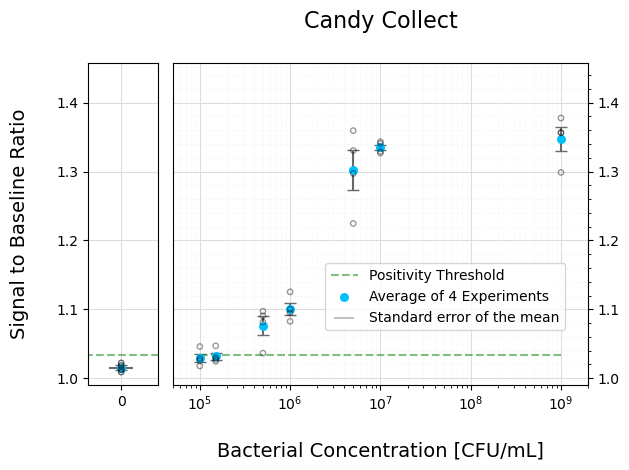

In [8]:
f, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 6]})
axes[1].yaxis.tick_right()
axes[1].set_xscale("log")
axes[1].set_ylim(0.99,lim)
axes[0].set_ylim(0.99,lim)
axes[0].set_xlim(-.9, 1)
axes[0].yaxis.grid(which='major', color='#DDDDDD', zorder = 0, linewidth=0.8)
axes[0].xaxis.grid(which='major', color='#DDDDDD', zorder = 0, linewidth=0.8)
axes[0].set_xticks([0])
axes[0].set_ylabel('Signal to Baseline Ratio\n', fontsize = 14)
alpha = 1
color1, color2, color3, color4 = 'deepskyblue', 'magenta', 'darkorange', 'lightorange'
s=20

axes[0].scatter(df.bacterial_load.iloc[0], df.avg.iloc[0], c=color1, zorder = 3, linewidths=2, alpha = alpha, marker='o', s = s)

axes[0].scatter(df.bacterial_load.iloc[0], df.avg.iloc[0], c='dimgray', marker = '_', s = 300)
axes[0].errorbar(df.bacterial_load.iloc[0], df.avg.iloc[0], df.stnd.iloc[0]/(4**.5), marker = '_', c = 'dimgray', ecolor = 'dimgray', capsize = 4)

axes[1].scatter(df.bacterial_load.iloc[1:], df.avg.iloc[1:], c=color1, linewidths=2, alpha = alpha, zorder = 3, marker='o', s = s) 
axes[1].errorbar(df.bacterial_load.iloc[1:], df.avg.iloc[1:], df.stnd.iloc[1:]/(4**.5), marker = '_', color = 'none', ecolor = 'dimgray', capsize = 4)

axes[1].plot(df.bacterial_load.iloc[1:], df.threshold.iloc[1:], label = 'Positivity Threshold', linestyle = 'dashed', c='g', alpha = 0.5)
axes[0].plot([-1, 1], df.threshold.values[:2], linestyle = 'dashed', c='g', alpha = 0.5)

for i in range(len(df[1:])):
    axes[1].scatter(df.bacterial_load.iloc[i+1], df.N1.iloc[i+1], c='k', linewidths=1, alpha = .4, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)
    axes[1].scatter(df.bacterial_load.iloc[i+1], df.N2.iloc[i+1], c='k', linewidths=1, alpha = .4, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15) 
    axes[1].scatter(df.bacterial_load.iloc[i+1], df.N3.iloc[i+1], c='k', linewidths=1, alpha = .4, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)
    axes[1].scatter(df.bacterial_load.iloc[i+1], df.N4.iloc[i+1], c='k', linewidths=1, alpha = .4, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)

    
axes[0].scatter(df.bacterial_load.iloc[0], df.N1.iloc[0], c='k', linewidths=1, alpha = .6, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)
axes[0].scatter(df.bacterial_load.iloc[0], df.N2.iloc[0], c='k', linewidths=1, alpha = .6, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15) 
axes[0].scatter(df.bacterial_load.iloc[0], df.N3.iloc[0], c='k', linewidths=1, alpha = .6, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)
axes[0].scatter(df.bacterial_load.iloc[0], df.N4.iloc[0], c='k', linewidths=1, alpha = .6, zorder = 3, marker=MarkerStyle('o', fillstyle='none'), s = 15)
    
axes[1].scatter(df.bacterial_load.iloc[0], df.avg.iloc[0], c=color1, linewidths=2, alpha = alpha, zorder = 3, marker='o', s = s, label = 'Average of 4 Experiments')

axes[1].scatter(df.bacterial_load.iloc[0], df.avg.iloc[0], c='dimgray', marker = '_', alpha=0.4, s = 200, label = 'Standard error of the mean')

plt.subplots_adjust(wspace=.05, hspace=0)
plt.title('Candy Collect\n', fontsize=16)
plt.xlabel('\nBacterial Concentration [CFU/mL]', fontsize = 14)
axes[1].set_xlim(.5*10**5, 2*10**9)
axes[0].set_facecolor('white')
axes[1].set_facecolor('white')
plt.minorticks_on()
plt.grid(which='both', zorder = 0)
plt.legend(facecolor='white', bbox_to_anchor=(.35,.4))
plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder = 0)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder = 0)
plt.tight_layout()
f.savefig('cc.png', dpi = 900)

plt.show()

In [9]:
np.amax(np.amax(df[['N1', 'N2', 'N3', 'N4']]))

1.3775871597054383

In [10]:
df[1:-1]

,N1,N2,N3,N4,avg,stnd,err,threshold,bacterial_load
1,1.017751,1.028810,1.025577,1.045990,1.029532,0.011914,0.002978,1.033192,100000.0
2,1.027347,1.029749,1.024554,1.046994,1.032161,0.010114,0.002528,1.033192,150000.0
3,1.036508,1.090561,1.097208,1.081458,1.076434,0.027389,0.006847,1.033192,500000.0
4,1.082572,1.094621,1.100004,1.125345,1.100636,0.018013,0.004503,1.033192,1000000.0
5,1.330525,1.297095,1.224610,1.359364,1.302898,0.058064,0.014516,1.033192,5000000.0
6,1.343196,1.326785,1.340791,1.329095,1.334967,0.008227,0.002057,1.033192,10000000.0
